In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import keras
from keras.models import Sequential
from keras.layers import Dense
import sklearn
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
# Loading dataset
data = pd.read_csv("G:/Sapienza/3rd semester/BDOS/pima-indians-diabetes-database/diabetes.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# Here our target varible is "outcome" : 
target_data = data['Outcome'].describe()
target_data

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [6]:
# Getting the numerical features of the data :
numerical_features = data._get_numeric_data()
numerical_features.shape

(768, 9)

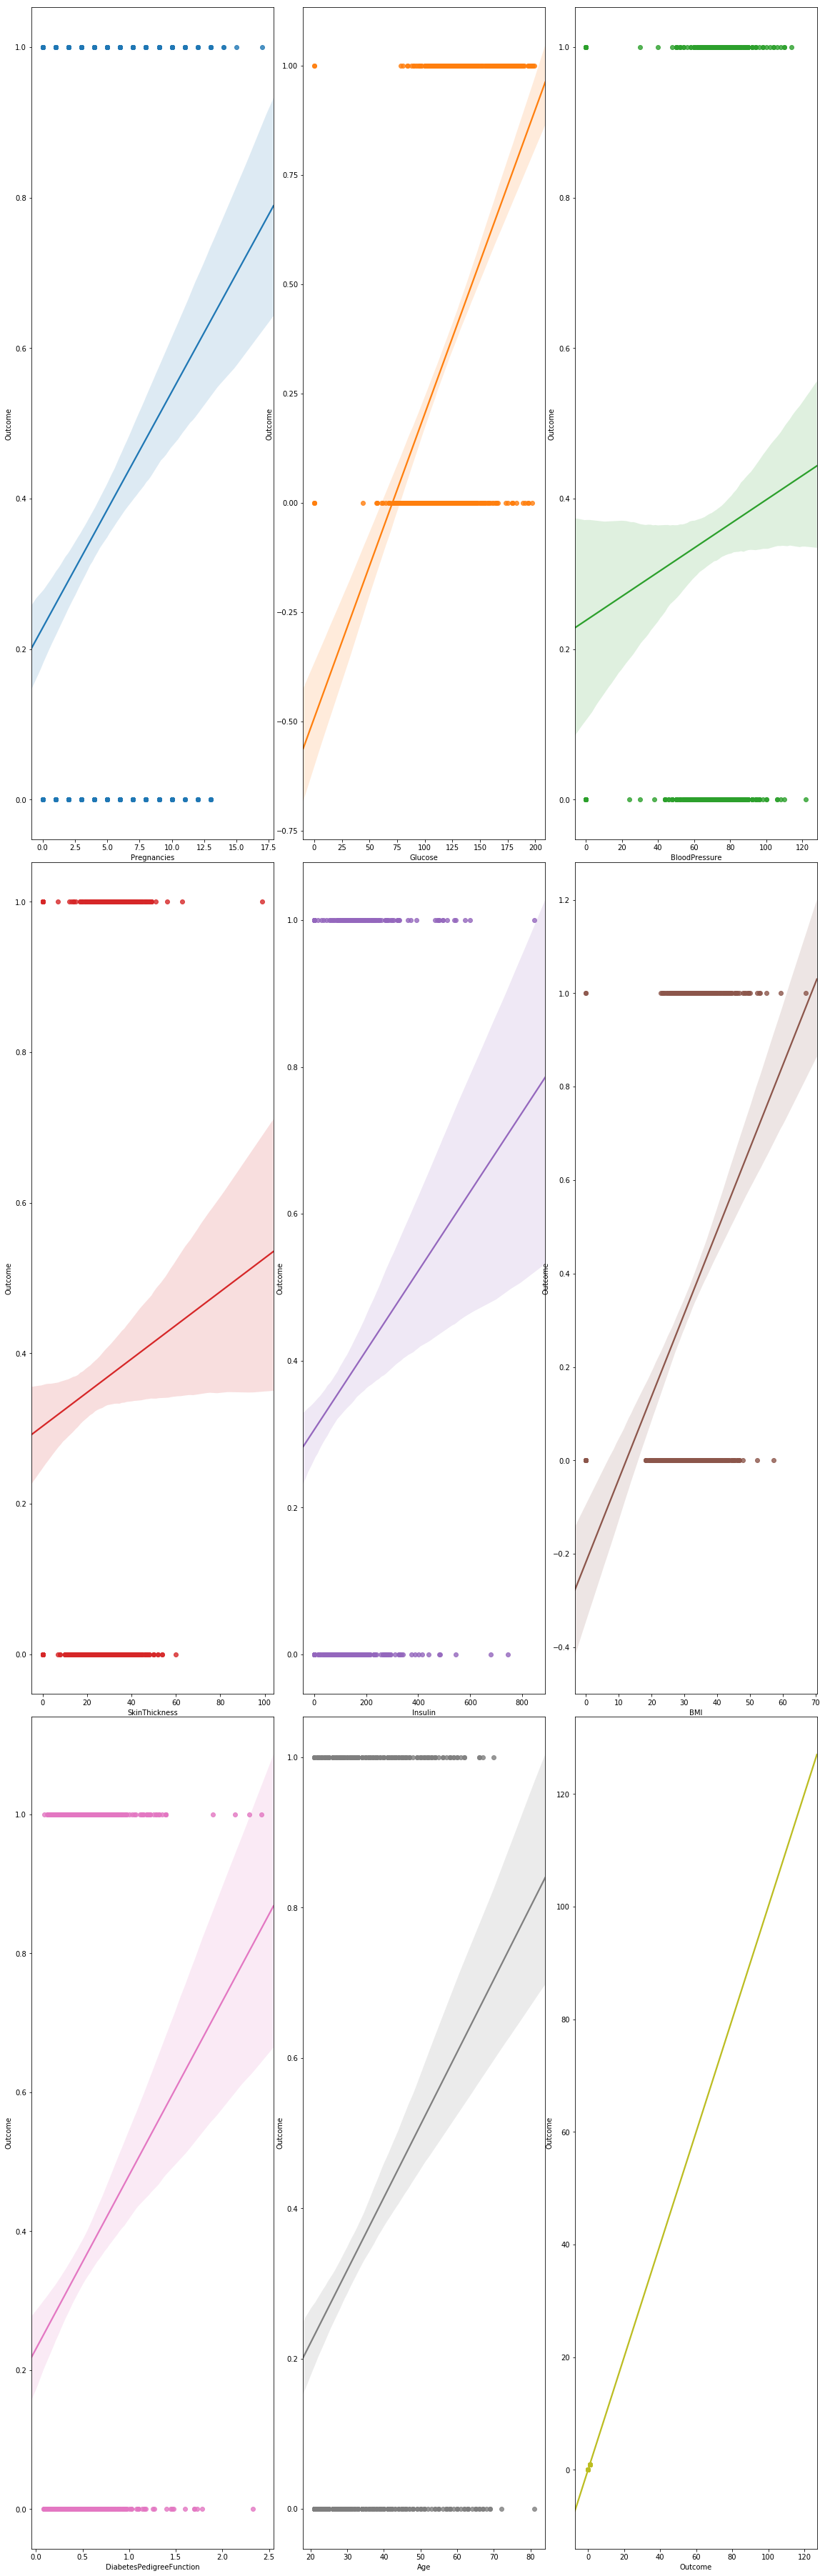

In [7]:
# There are 9 numerical features, fitting a 4x10 subplot in train set:
fig, axes = plt.subplots(3, 3, figsize=[16,50])
fig.tight_layout()
axes = np.ravel(axes)
for i, column in enumerate(numerical_features.columns):
    sns.regplot(column, "Outcome", numerical_features, dropna=True, ax = axes[i])

In [8]:
# Correlation test 
correlation = data.corr()
correlation.sort_values(["Outcome"])
correlation.Outcome

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

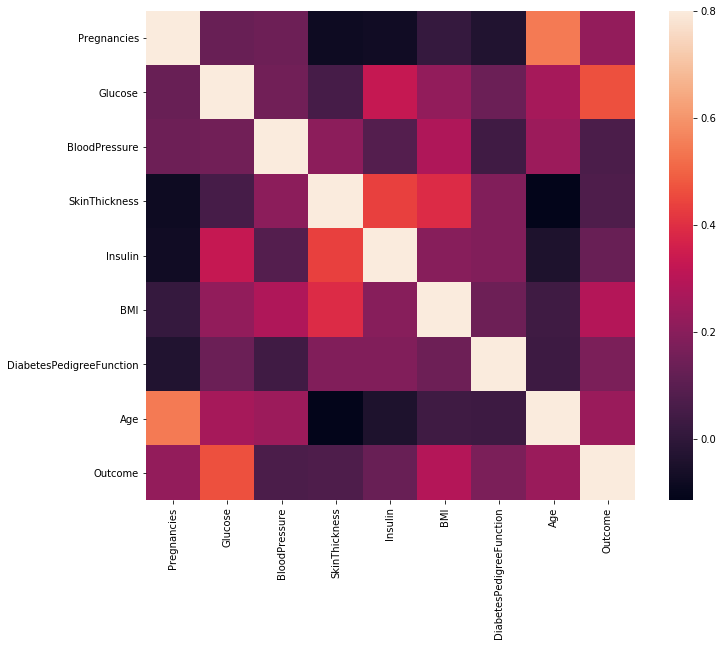

In [9]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation, vmax=.8, square=True);

# Data visualisation

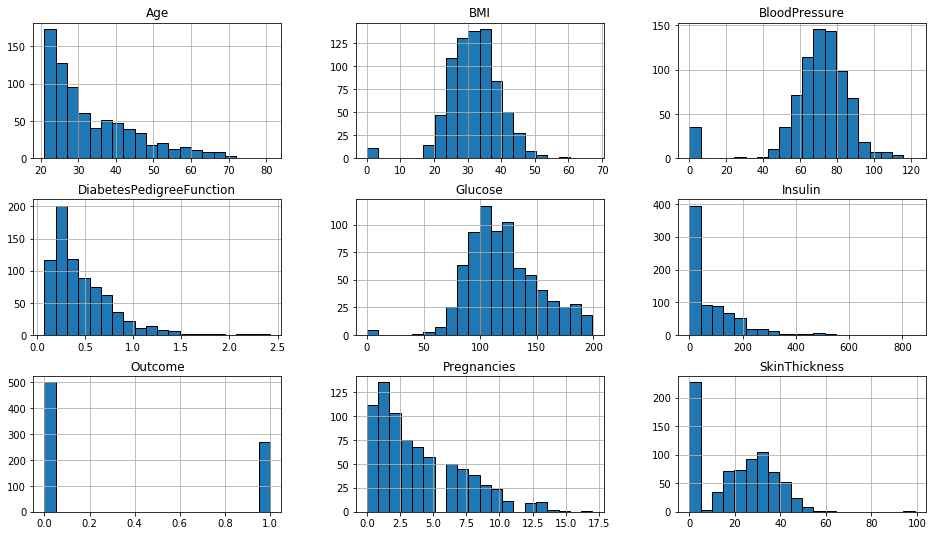

In [10]:
import matplotlib.pyplot as plt
data.hist(figsize=(16,9), edgecolor="black", bins=20)
plt.show()

#finding the statistics of target variable 

In [11]:
#Finding the skewness and kurtosis of data:
skewness = skew(data["Outcome"])
kurtosis = kurtosis(data["Outcome"])

In [12]:
print("Skewness of the data:" , skewness)
print("Kurtosis of the data:", kurtosis)

Skewness of the data: 0.6337757030614577
Kurtosis of the data: -1.5983283582089547


The normal distribution with acceptable range for skewness is (−1,1) and (−2,2) for kurtosis . From the value we can infer that our data is normally distributed.

In [13]:
# Finding mean and standard deviation:
mean = data["Outcome"].describe()['mean']
SD = data["Outcome"].describe()['std'] # deviation of data from mean
print("mean:", mean)
print("Standard deviation:" , SD)

mean: 0.3489583333333333
Standard deviation: 0.4769513772427971


# Feature Engineering

In [14]:
# finding the median of the features and replacing zero :

BMI_median = data["BMI"].median()
BloodPressure_median = data["BloodPressure"].median()
DiabetesPedigreeFunction_median = data["DiabetesPedigreeFunction"].median()
Glucose_median= data["Glucose"].median()
Insulin_median = data["Insulin"].median()
SkinThickness_median = data["SkinThickness"].median()

data["BMI"] = data['BMI'].replace(to_replace=0, value=BMI_median)
data["BloodPressure"] = data["BloodPressure"].replace(to_replace=0, value=BloodPressure_median)
data["DiabetesPedigreeFunction"] = data["DiabetesPedigreeFunction"].replace(to_replace=0, value=DiabetesPedigreeFunction_median)
data["Glucose"]= data["Glucose"].replace(to_replace=0, value=Glucose_median)
data["Insulin"]= data["Insulin"].replace(to_replace=0, value=Insulin_median)
data["SkinThickness"]= data["SkinThickness"].replace(to_replace=0, value=SkinThickness_median)

# Model building using Machine learning

In [15]:
# Splitting the model :
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(576, 8) (192, 8) (576,) (192,)


In [17]:
# To deal with the overall outliers in the dataset
from sklearn.preprocessing import RobustScaler
R = RobustScaler()

In [18]:
R.fit(X_train)
R.fit(X_test)
X_train = R.transform(X_train)
X_test = R.transform(X_test)


In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(logreg_acc)

79.69


In [20]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
decisiontree_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(decisiontree_acc)

72.92


In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
randomforest_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(randomforest_acc)

76.04


C:\Users\paavai\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
gbk_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(gbk_acc)

77.08


In [23]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(knn_acc)

76.04


In [24]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gaussian_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(gaussian_acc)

76.04


In [25]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(svc_acc)

73.96


In [26]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
perceptron_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(perceptron_acc)

74.48


C:\Users\paavai\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [27]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(sgd_acc)

75.0


C:\Users\paavai\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [28]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree', 'Gradient Boosting Classifier', 'k-Nearest neighbors'],
    'Score': [svc_acc, logreg_acc, 
              randomforest_acc, gaussian_acc, perceptron_acc, 
              sgd_acc, decisiontree_acc, gbk_acc,knn_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,79.69
7,Gradient Boosting Classifier,77.08
2,Random Forest,76.04
3,Naive Bayes,76.04
8,k-Nearest neighbors,76.04
5,Stochastic Gradient Decent,75.00
4,Perceptron,74.48
0,Support Vector Machines,73.96
6,Decision Tree,72.92


# Model building using Deep learning
#Neural network implementation using keras

In [29]:
# Reading the dataset:
X= data.iloc[:,0:8]
y= data.iloc[:,8]# target variable 

In [30]:
# Normalising the values by applying Scalar preprocessing to remove outliers for classification data:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [31]:
#Spliting data into 80% training and 20% testing data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

In [32]:
#Creating models:
model = Sequential()
model.add(Dense(500, input_dim=8, init='uniform', activation='relu')) # 500 neurons
model.add(Dense(1, activation='sigmoid')) # 1 output neuron

C:\Users\paavai\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Fit the model
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
370/768 [=============>................] - ETA: 1s - loss: 0.5759 - accuracy: 0.7081

C:\Users\paavai\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.150508). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


768/768 [==============================] - 1s 2ms/step - loss: 0.5312 - accuracy: 0.7292
Epoch 2/150
768/768 [==============================] - 0s 469us/step - loss: 0.4589 - accuracy: 0.7708
Epoch 3/150
768/768 [==============================] - 0s 478us/step - loss: 0.4479 - accuracy: 0.7734
Epoch 4/150
768/768 [==============================] - 0s 504us/step - loss: 0.4416 - accuracy: 0.7799
Epoch 5/150
768/768 [==============================] - 0s 496us/step - loss: 0.4374 - accuracy: 0.7865
Epoch 6/150
768/768 [==============================] - 0s 492us/step - loss: 0.4319 - accuracy: 0.79040s - loss: 0.4342 - ac
Epoch 7/150
768/768 [==============================] - 0s 467us/step - loss: 0.4277 - accuracy: 0.7891
Epoch 8/150
768/768 [==============================] - 0s 492us/step - loss: 0.4281 - accuracy: 0.7930
Epoch 9/150
768/768 [==============================] - 0s 501us/step - loss: 0.4239 - accuracy: 0.7956
Epoch 10/150
768/768 [==============================] - 0s 509us/

768/768 [==============================] - 0s 496us/step - loss: 0.2941 - accuracy: 0.8789
Epoch 80/150
768/768 [==============================] - 0s 483us/step - loss: 0.2930 - accuracy: 0.8776
Epoch 81/150
768/768 [==============================] - 0s 499us/step - loss: 0.2912 - accuracy: 0.8789
Epoch 82/150
768/768 [==============================] - 0s 500us/step - loss: 0.2944 - accuracy: 0.8750
Epoch 83/150
768/768 [==============================] - 0s 500us/step - loss: 0.2857 - accuracy: 0.8698
Epoch 84/150
768/768 [==============================] - 0s 505us/step - loss: 0.2860 - accuracy: 0.8737
Epoch 85/150
768/768 [==============================] - 0s 477us/step - loss: 0.2884 - accuracy: 0.8763
Epoch 86/150
768/768 [==============================] - 0s 494us/step - loss: 0.2849 - accuracy: 0.8789
Epoch 87/150
768/768 [==============================] - 0s 501us/step - loss: 0.2797 - accuracy: 0.8880
Epoch 88/150
768/768 [==============================] - 0s 484us/step - loss:

In [35]:
# Evaluating the accuracy
model.evaluate(X_test, y_test)[1]

154/154 [==============================] - 0s 539us/step


0.9220778942108154